In [1]:
import os
import sys
sys.path.append(r"../")
import numpy as np
import matplotlib.pyplot as plt
# from nodes.HR import HR
from nodes.HH import HH
from connect.ws_small_world import create_sw
# from synapse.synapse import synbase
from utils.statis import cal_cv, cal_synFactor
from utils.utils import spikevent, delayer
from utils.utils_plot import plot_firing_raster

from synapse.synapse_exp import synbase_exp
from synapse.synapse_exp import syn_exp_stdp

In [2]:
seed = 0
np.random.seed(seed)                # 给numpy设置随机种子

In [3]:
N = 10
Conn = np.ones((N,N))
np.fill_diagonal(Conn , 0)
pre = HH(N=N)
post = pre
pre.Iex = 0
syn = synbase_exp(pre, post, conn=Conn)
syn.w.fill(.0141742)

In [4]:
men =[]
time =[]
Io = np.zeros(N)
for i in range(30000):
    Io.fill(0)
    if i==10000:
        Io[:4] = 1000
    if i==20000:
        Io[:4] = 1000

    I_post = syn()
    pre(Io+I_post)
    
    men.append(pre.mem.copy())
    time.append(pre.t)

In [5]:
men = np.array(men)
men.shape

(30000, 10)

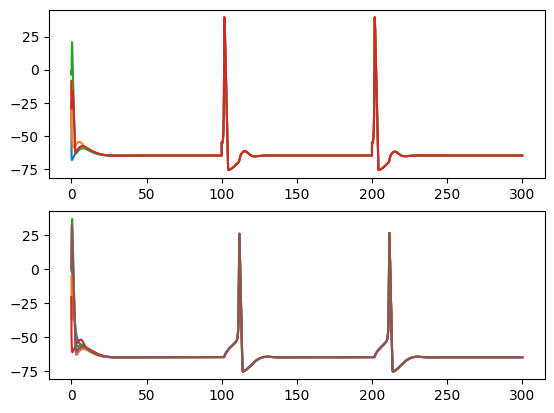

In [6]:
plt.subplot(2, 1, 1)
plt.plot(time, men[:, :4] )
plt.subplot(2, 1, 2)
plt.plot(time, men[:, 4:])
plt.show()

# 测试STDP

In [7]:
N = 1
dt = 0.01
method = "euler"
# conn = create_sw(N, 2, 0.5)
conn = np.ones((1,1), dtype=int)
delta_t_list = np.arange(-60, 60, 10)
Ipre_t = np.arange(100, 1000, 200, dtype=int)*100
w_end = []

In [8]:
for delta_t in delta_t_list:
    delta_t = int(delta_t*100)
    pre = HH(N=N, method=method, dt=dt)
    post = HH(N=N, method=method, dt=dt)
    pre.Iex = 0
    post.Iex = 0
    syn = syn_exp_stdp(pre, post, conn=conn)
    syn.lr = 1e-2
    w_init = syn.w.copy()

    # 初始化神经元
    for i in range(10000):
        pre()
        post()

    Ipost_t = Ipre_t+delta_t

    for i in range(150000):
        pre.Iex = 0
        post.Iex = 0
        if i in Ipre_t:
            pre.Iex = 1000
        if i in Ipost_t:
            post.Iex = 1000
        Isyn = syn()
        pre()
        post()

    w_end.append(syn.w[0,0])

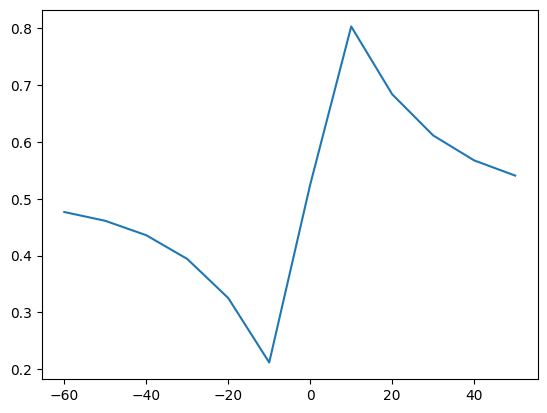

In [9]:
plt.plot(delta_t_list, w_end)